In [1]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
data = pd.read_csv("final_without_weather.csv")
data.drop(['Month'], axis =1, inplace= True)
data.set_index("pickuptime", inplace= True)
num_pickups = data.total
num_green_pickups = data.green
num_yellow_pickups = data.yellow
data.drop(['green', 'yellow', 'total'], axis =1, inplace = True)

In [3]:
def series_to_supervised(data, n_in, n_out, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    
    if dropnan:
        agg.dropna(inplace = True)
        
    return agg

In [5]:
features_and_target = pd.concat([data, num_pickups], axis = 1)
values = features_and_target.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(values)

n_hours = 23

reframed = series_to_supervised(scaled, n_hours, 1)

n_features = features_and_target.shape[1]


In [8]:
# delete significantly wrong data & compare the date value
total_values = reframed.values
n_p = np.argmin(total_values[365*24*3:, -1])
n_p = n_p + 365*24*3

a = total_values[: n_p, :]
b = total_values[n_p + n_hours + 1 : , :]
total_values = np.concatenate((a, b), axis=0)

# result variable
result = np.zeros((5, 7))

Train on 3754 samples, validate on 911 samples
Epoch 1/100
 - 2s - loss: 0.1605 - val_loss: 0.0817
Epoch 2/100
 - 1s - loss: 0.1160 - val_loss: 0.0784
Epoch 3/100
 - 1s - loss: 0.1086 - val_loss: 0.0735
Epoch 4/100
 - 1s - loss: 0.1020 - val_loss: 0.0699
Epoch 5/100
 - 1s - loss: 0.0966 - val_loss: 0.0665
Epoch 6/100
 - 1s - loss: 0.0916 - val_loss: 0.0632
Epoch 7/100
 - 1s - loss: 0.0862 - val_loss: 0.0601
Epoch 8/100
 - 1s - loss: 0.0819 - val_loss: 0.0563
Epoch 9/100
 - 1s - loss: 0.0763 - val_loss: 0.0516
Epoch 10/100
 - 1s - loss: 0.0710 - val_loss: 0.0464
Epoch 11/100
 - 1s - loss: 0.0664 - val_loss: 0.0435
Epoch 12/100
 - 1s - loss: 0.0618 - val_loss: 0.0404
Epoch 13/100
 - 1s - loss: 0.0585 - val_loss: 0.0380
Epoch 14/100
 - 1s - loss: 0.0554 - val_loss: 0.0360
Epoch 15/100
 - 1s - loss: 0.0524 - val_loss: 0.0339
Epoch 16/100
 - 1s - loss: 0.0488 - val_loss: 0.0314
Epoch 17/100
 - 1s - loss: 0.0461 - val_loss: 0.0300
Epoch 18/100
 - 1s - loss: 0.0447 - val_loss: 0.0297
Epoch 19

 - 1s - loss: 0.0213 - val_loss: 0.0172
Epoch 55/100
 - 1s - loss: 0.0209 - val_loss: 0.0173
Epoch 56/100
 - 1s - loss: 0.0209 - val_loss: 0.0169
Epoch 57/100
 - 1s - loss: 0.0212 - val_loss: 0.0164
Epoch 58/100
 - 1s - loss: 0.0212 - val_loss: 0.0164
Epoch 59/100
 - 1s - loss: 0.0206 - val_loss: 0.0163
Epoch 60/100
 - 1s - loss: 0.0202 - val_loss: 0.0165
Epoch 61/100
 - 1s - loss: 0.0201 - val_loss: 0.0165
Epoch 62/100
 - 1s - loss: 0.0201 - val_loss: 0.0164
Epoch 63/100
 - 1s - loss: 0.0200 - val_loss: 0.0164
Epoch 64/100
 - 1s - loss: 0.0200 - val_loss: 0.0166
Epoch 65/100
 - 1s - loss: 0.0197 - val_loss: 0.0165
Epoch 66/100
 - 1s - loss: 0.0198 - val_loss: 0.0165
Epoch 67/100
 - 1s - loss: 0.0194 - val_loss: 0.0166
Epoch 68/100
 - 1s - loss: 0.0196 - val_loss: 0.0169
Epoch 69/100
 - 1s - loss: 0.0193 - val_loss: 0.0166
Epoch 70/100
 - 1s - loss: 0.0195 - val_loss: 0.0169
Epoch 71/100
 - 1s - loss: 0.0193 - val_loss: 0.0171
Epoch 72/100
 - 1s - loss: 0.0194 - val_loss: 0.0178
Epoch 

Epoch 8/100
 - 1s - loss: 0.0905 - val_loss: 0.0481
Epoch 9/100
 - 1s - loss: 0.0800 - val_loss: 0.0463
Epoch 10/100
 - 1s - loss: 0.0710 - val_loss: 0.0490
Epoch 11/100
 - 1s - loss: 0.0629 - val_loss: 0.0328
Epoch 12/100
 - 1s - loss: 0.0551 - val_loss: 0.0352
Epoch 13/100
 - 1s - loss: 0.0511 - val_loss: 0.0338
Epoch 14/100
 - 1s - loss: 0.0464 - val_loss: 0.0316
Epoch 15/100
 - 1s - loss: 0.0455 - val_loss: 0.0309
Epoch 16/100
 - 1s - loss: 0.0428 - val_loss: 0.0291
Epoch 17/100
 - 1s - loss: 0.0408 - val_loss: 0.0287
Epoch 18/100
 - 1s - loss: 0.0390 - val_loss: 0.0281
Epoch 19/100
 - 1s - loss: 0.0373 - val_loss: 0.0278
Epoch 20/100
 - 1s - loss: 0.0358 - val_loss: 0.0275
Epoch 21/100
 - 1s - loss: 0.0346 - val_loss: 0.0272
Epoch 22/100
 - 1s - loss: 0.0336 - val_loss: 0.0264
Epoch 23/100
 - 1s - loss: 0.0327 - val_loss: 0.0255
Epoch 24/100
 - 1s - loss: 0.0318 - val_loss: 0.0240
Epoch 25/100
 - 1s - loss: 0.0311 - val_loss: 0.0230
Epoch 26/100
 - 1s - loss: 0.0293 - val_loss: 0.

Epoch 62/100
 - 1s - loss: 0.0220 - val_loss: 0.0197
Epoch 63/100
 - 1s - loss: 0.0224 - val_loss: 0.0198
Epoch 64/100
 - 1s - loss: 0.0227 - val_loss: 0.0200
Epoch 65/100
 - 1s - loss: 0.0226 - val_loss: 0.0198
Epoch 66/100
 - 1s - loss: 0.0223 - val_loss: 0.0197
Epoch 67/100
 - 1s - loss: 0.0218 - val_loss: 0.0197
Epoch 68/100
 - 1s - loss: 0.0218 - val_loss: 0.0192
Epoch 69/100
 - 1s - loss: 0.0216 - val_loss: 0.0191
Epoch 70/100
 - 1s - loss: 0.0215 - val_loss: 0.0190
Epoch 71/100
 - 1s - loss: 0.0214 - val_loss: 0.0188
Epoch 72/100
 - 1s - loss: 0.0212 - val_loss: 0.0189
Epoch 73/100
 - 1s - loss: 0.0213 - val_loss: 0.0190
Epoch 74/100
 - 1s - loss: 0.0213 - val_loss: 0.0185
Epoch 75/100
 - 1s - loss: 0.0209 - val_loss: 0.0185
Epoch 76/100
 - 1s - loss: 0.0209 - val_loss: 0.0187
Epoch 77/100
 - 1s - loss: 0.0206 - val_loss: 0.0184
Epoch 78/100
 - 1s - loss: 0.0204 - val_loss: 0.0183
Epoch 79/100
 - 1s - loss: 0.0202 - val_loss: 0.0182
Epoch 80/100
 - 1s - loss: 0.0201 - val_loss: 

 - 1s - loss: 0.0417 - val_loss: 0.0260
Epoch 16/100
 - 1s - loss: 0.0385 - val_loss: 0.0239
Epoch 17/100
 - 1s - loss: 0.0365 - val_loss: 0.0223
Epoch 18/100
 - 1s - loss: 0.0349 - val_loss: 0.0218
Epoch 19/100
 - 1s - loss: 0.0342 - val_loss: 0.0219
Epoch 20/100
 - 1s - loss: 0.0337 - val_loss: 0.0217
Epoch 21/100
 - 1s - loss: 0.0328 - val_loss: 0.0218
Epoch 22/100
 - 1s - loss: 0.0318 - val_loss: 0.0216
Epoch 23/100
 - 1s - loss: 0.0311 - val_loss: 0.0222
Epoch 24/100
 - 1s - loss: 0.0314 - val_loss: 0.0218
Epoch 25/100
 - 1s - loss: 0.0313 - val_loss: 0.0207
Epoch 26/100
 - 1s - loss: 0.0315 - val_loss: 0.0206
Epoch 27/100
 - 1s - loss: 0.0305 - val_loss: 0.0206
Epoch 28/100
 - 1s - loss: 0.0294 - val_loss: 0.0200
Epoch 29/100
 - 1s - loss: 0.0290 - val_loss: 0.0199
Epoch 30/100
 - 1s - loss: 0.0287 - val_loss: 0.0199
Epoch 31/100
 - 1s - loss: 0.0281 - val_loss: 0.0197
Epoch 32/100
 - 1s - loss: 0.0281 - val_loss: 0.0196
Epoch 33/100
 - 1s - loss: 0.0279 - val_loss: 0.0196
Epoch 

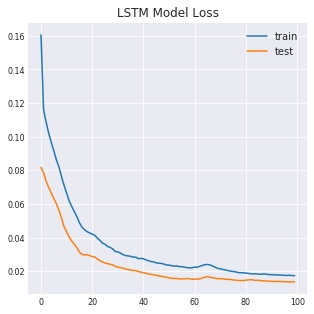

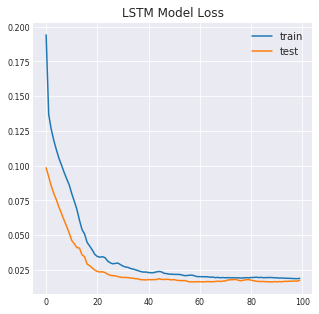

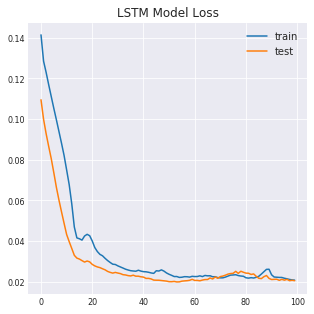

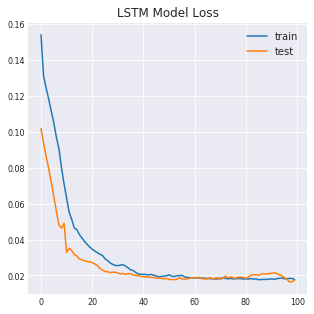

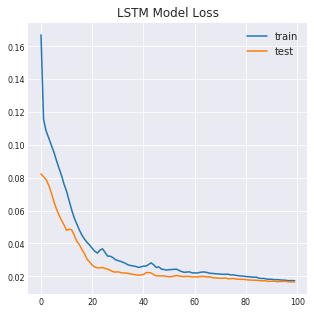

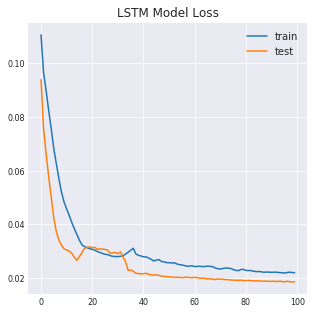

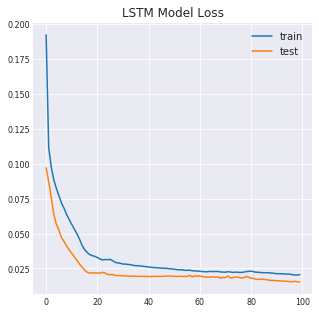

In [9]:
for i in range (7):
    values = total_values[total_values[:, -3] == total_values[120 + 24*i, 2]]
    n_train_hours = 3754
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    n_obs = n_hours * n_features
    train_X, train_y = train[:, :n_obs], train[:, -1]
    test_X, test_y = test[:, :n_obs], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

    # design network
    model = Sequential()
    model.add(LSTM(24, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')

    # fit network
    history = model.fit(train_X, train_y, epochs=100, batch_size=100,
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)
    
    history_loss = pd.DataFrame()
    history_loss['train'] = history.history['loss']
    history_loss['test'] = history.history['val_loss']
    history_loss.plot(figsize=(5,5), fontsize=8,
                title='LSTM Model Loss');
    
    # make a prediction 
    yhat = model.predict(test_X)
    # reshape back to 2d
    test_X = test_X.reshape((test_X.shape[0], -1))

    # invert scaling for forecast# invert 
    inv_yhat = np.concatenate((test[:, 115:119], yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test[:, 115:119], test_y), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]
    inv_yhat_gte_zero = inv_yhat.copy()
    inv_yhat_gte_zero[inv_yhat_gte_zero < 0] = 0

    # calculate r2
    result[0, i] = r2_score(inv_y, inv_yhat)

    # calculate mean absolute error
    result[1, i] = mean_absolute_error(inv_y, inv_yhat)

    # calculate rmse
    rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
    result[2, i]= rmse

    # calculate mean absolute error percentage
    maep = np.mean(np.abs((inv_y - inv_yhat)/inv_y))*100
    result[3, i] = maep
    
    #train bias
    yhat_t = model.predict(train_X)
    # reshape back to 2d
    train_X = train_X.reshape((train_X.shape[0], -1))

    # invert scaling for forecast# invert 
    inv_yhat_t = np.concatenate((train[:, 115:119], yhat_t), axis=1)
    inv_yhat_t = scaler.inverse_transform(inv_yhat_t)
    inv_yhat_t = inv_yhat_t[:,-1]

    # invert scaling for actual
    train_y = train_y.reshape((len(train_y), 1))
    inv_y_t = np.concatenate((train[:, 115:119], train_y), axis=1)
    inv_y_t = scaler.inverse_transform(inv_y_t)
    inv_y_t = inv_y_t[:,-1]
    inv_yhat_gte_zero = inv_yhat_t.copy()
    inv_yhat_gte_zero[inv_yhat_gte_zero < 0] = 0

    index = (np.abs((inv_y_t - inv_yhat_t)/inv_y_t) < 1)
    # calculate mean absolute error percentage
    maep = np.mean(np.abs((inv_y_t[index] - inv_yhat_t[index])/inv_y_t[index]))*100
    
    result[4, i] = maep
    

In [10]:
result

array([[9.68949734e-01, 9.58341783e-01, 9.48224147e-01, 9.64134535e-01,
        9.60281196e-01, 9.54927006e-01, 9.57995556e-01],
       [7.63906982e+02, 9.84865051e+02, 1.15450842e+03, 9.71399719e+02,
        9.35397766e+02, 1.04162939e+03, 8.61774353e+02],
       [1.03685468e+03, 1.34536900e+03, 1.56273614e+03, 1.29744537e+03,
        1.29671836e+03, 1.35497744e+03, 1.29051797e+03],
       [9.38861296e+00, 1.43120617e+01, 1.18778609e+01, 9.16539654e+00,
        9.53702554e+00, 8.69324878e+00, 7.95893744e+00],
       [9.44179222e+00, 1.04477130e+01, 1.36357591e+01, 8.27227980e+00,
        6.85968995e+00, 8.06223229e+00, 7.77811557e+00]])